In [1]:
from heeps.config.read_config import read_config
from heeps.config.update_config import update_config
from heeps.util.img_processing import resize_img, pad_img, oversamp
from heeps.util.round2 import round2odd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [2]:
nimg = 10526                # size of the high-res pupil image
pupil_img_size = 39.9988    # pupil image in m
diam_nominal_ext = 38.542   # nominal diameter in m
data_spacing = 0.0004       # in mm
nkernel_pad = 4000
nkernel = 127
pupil_scaling = 4
kernel_size = nkernel_pad*data_spacing
# METIS "pupil image" size in mm
pupil_img_size_METIS = {'IMG': 45/diam_nominal_ext*pupil_img_size, 
                        'LMS': 28/diam_nominal_ext*pupil_img_size}
print('pupil_img_size_METIS = %s mm'%dict((x, round(y, 2)) 
    for x, y in pupil_img_size_METIS.items()))
npup_conv_hr = dict((x, int(np.ceil(y/data_spacing))) 
    for x, y in pupil_img_size_METIS.items())
print('data_spacing = %s mm'%data_spacing)
print('npup_conv_hr = %s'%npup_conv_hr)
# resample kernel
print('nkernel_pad = %s, nkernel = %s'%(nkernel_pad, nkernel))
samp = dict((x, oversamp(nimg, y*nkernel/nkernel_pad, precision=1e-2))
    for x, y in npup_conv_hr.items())
nimg_pad = dict((x, y[0]) for x, y in samp.items())
npup_conv = dict((x, y[1]) for x, y in samp.items())
print('nimg = %s'%nimg)
print('nimg_pad = %s'%nimg_pad)
print('npup_conv = %s'%npup_conv)
npupil = {'L': update_config(**dict(read_config(), band='L'))['npupil'],
          'N2':update_config(**dict(read_config(), band='N2'))['npupil']}
print('npupil = %s'%npupil)

pupil_img_size_METIS = {'IMG': 46.7, 'LMS': 29.06} mm
data_spacing = 0.0004 mm
npup_conv_hr = {'IMG': 116753, 'LMS': 72646}
nkernel_pad = 4000, nkernel = 127
nimg = 10526
nimg_pad = {'IMG': 10549, 'LMS': 10583}
npup_conv = {'IMG': 3715, 'LMS': 2319}
npupil = {'L': 285, 'N2': 119}


In [3]:
band = 'L'
plane = 'IMG'
nkernel_vpm = round2odd(nkernel*pupil_scaling*npupil[band]/npup_conv[plane])
npup_vpm = npup_conv[plane]*nkernel_vpm/nkernel
npad, npup_vpm = oversamp(nimg, npup_vpm, precision=1e-2)
print('APP:')
print('   nkernel = %s, npup_conv = %s'%(nkernel, npup_conv[plane]))
print('VPM:')
print('   nkernel_vpm = %s, npup_vpm = %s'%(nkernel_vpm, npup_vpm))

APP:
   nkernel = 127, npup_conv = 3715
VPM:
   nkernel_vpm = 39, npup_vpm = 1147


In [4]:
def load_kernel(file, nkernel=nkernel, nkernel_pad=nkernel_pad):
    kernel = np.loadtxt(file , delimiter='\t', skiprows=5)[1:,1:]
    kernel /= np.max(kernel)
    kernel = resize_img(pad_img(kernel, nkernel_pad), nkernel)
    return kernel

def show_kernel(kernel, crop):
    c = kernel_size/2
    r = c*crop
    plt.figure()
    plt.imshow(kernel+1e-6, origin='lower', cmap=cm.rainbow, norm=colors.LogNorm(), 
        extent=[-c, c, -c, c])
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.colorbar()
    plt.clim(1e-2,1)

# APP sampling

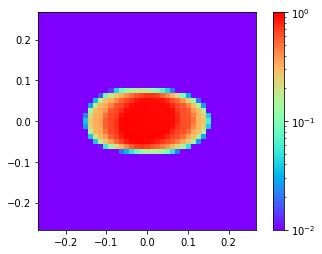

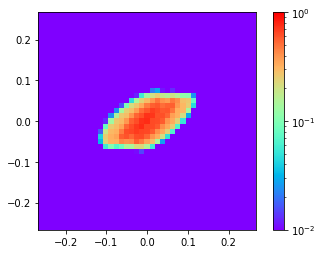

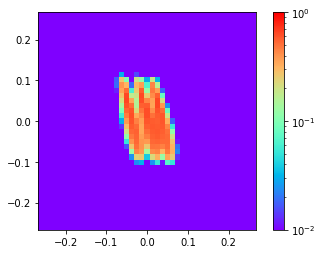

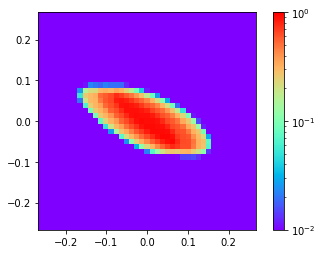

In [5]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/Desktop/Geometric PSFs')))
files = ['0.4 x 0.4 mm - 3 arcsec FoV/IMG_10.85_sweetspot1_pp1.txt',
         '0.4 x 0.4 mm - 3 arcsec FoV/IMG_10.85_sweetspot2_pp1.txt',
         '0.4 x 0.4 mm - 3 arcsec FoV/IMG_10.85_sweetspot3_pp4.txt',
         '0.4 x 0.4 mm - 3 arcsec FoV/IMG_10.85_worstcase_pp1.txt']
for file in files:
    show_kernel(load_kernel(file, nkernel=nkernel), crop=1/3)

# VPM sampling

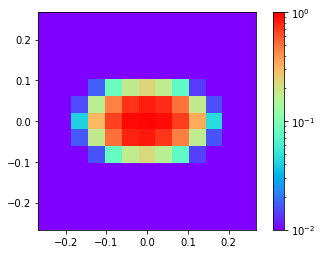

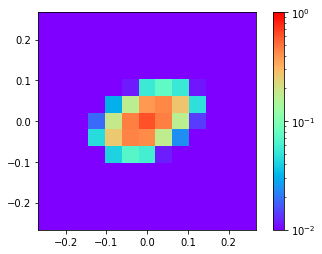

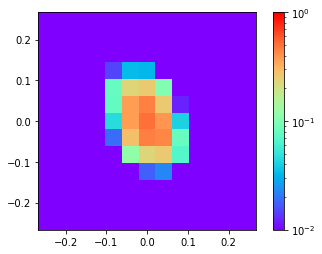

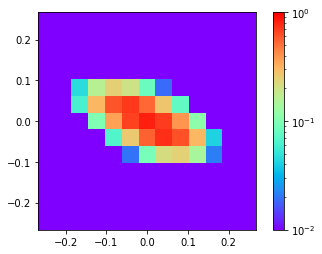

In [6]:
for file in files:
    show_kernel(load_kernel(file, nkernel=nkernel_vpm), crop=1/3)